** 需下載以下特徵模型，放置與本程式碼之子資料夾`model`，也就是說，以下的模型相對於本程式會有以下相對路徑：`model/haarcascade_**_.xml`
* 眼睛特徵模型：[haarcascade_eye.xml](https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_eye.xml)
* 嘴巴特徵模型：[haarcascade_mcs_mouth.xml](https://raw.githubusercontent.com/atduskgreg/opencv-processing/master/lib/cascade-files/haarcascade_mcs_mouth.xml)
* 鼻子特徵模型：[haarcascade_mcs_nose.xml](https://raw.githubusercontent.com/atduskgreg/opencv-processing/master/lib/cascade-files/haarcascade_mcs_nose.xml)

Screenshot saved as facial_organs_detection.png


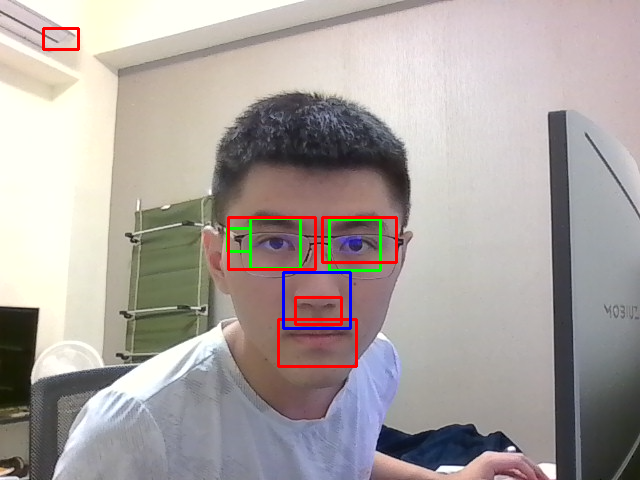

In [12]:
import cv2
cap = cv2.VideoCapture(0)                           # 讀取攝影鏡頭（webcam）
from IPython.display import Image, display

eye_cascade = cv2.CascadeClassifier("models/haarcascade_eye.xml")       # 使用眼睛模型
mouth_cascade = cv2.CascadeClassifier("models/haarcascade_mcs_mouth.xml")   # 使用嘴巴模型
nose_cascade = cv2.CascadeClassifier("models/haarcascade_mcs_nose.xml")    # 使用鼻子模型

if eye_cascade.empty():
    print("Error: Unable to load eye cascade classifier!")
if nose_cascade.empty():
    print("Error: Unable to load nose cascade classifier!")
if mouth_cascade.empty():
    print("Error: Unable to load mouth cascade classifier!")

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break

    w = frame.shape[1]                  # 畫面寬度
    h = frame.shape[0]                  # 畫面高度

    # 對影像作前處理，透過模糊的方式去除雜訊
    img = cv2.resize(frame,(w,h))
    gray = cv2.medianBlur(img, 1)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)

    eyes = eye_cascade.detectMultiScale(gray)      # 偵測眼睛
    for (x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    mouths = mouth_cascade.detectMultiScale(gray)    # 偵測嘴巴
    for (x, y, w, h) in mouths:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

    noses = nose_cascade.detectMultiScale(gray)     # 偵測鼻子
    for (x, y, w, h) in noses:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow('Live Video', img)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'): # 按下 'q' 鍵停止
        break
    elif key == ord('a'):  # 按下 'a' 鍵截圖並儲存
        cv2.imwrite('facial_organs_detection.png', img)
        print("Screenshot saved as facial_organs_detection.png")
        display(Image(filename='facial_organs_detection.png'))

cap.release()
cv2.destroyAllWindows()